In [1]:
# ignore this, it just makes the code lines easier to see

from IPython.core.display import HTML
HTML("""
<style>
#notebook code {
background-color: #333;
color: white;
padding: 0 0.25em;
}
</style>
""")

# this is the library that lets us do the cool vector/matrix math
# it abstracts a lot of functionality around dealing with matrices
import numpy as np
# by using a random seed, we ensure any random numbers I generate are reproducible on your computers
np.random.seed(1)

# Load Data

What's the most important part of big data? *Data!*

The files we're loading include
* A matrix that counts the occurrences of songs in each playlist
    * Each row of the matrix represents a song
    * Each column represents a playlist
    * If there is a `1` at row `i` and column `j`, it means that song `i` occurs in playlist `j`
    * Note: This is a numpy array so it has some special properties that normal matrices don't have
* An array that converts a track index to a track id
    * We only know the index numbers of the matrix, so we have to have a way to convert a given index to a track id
    * If we want to know the track id of the song at row `i`, we take `trackIndexToTrackId[i]`
* A dictionary to convert a track id to the appropriate index, for when we want to look stuff up
    * If we want to look up the song with id `'0m3Ze0cy8qBHSsV2exAfCw'` in the matrix, we need to know what row to check
    * We would figure out the row number by doing `trackIdToTrackIndex['0m3Ze0cy8qBHSsV2exAfCw']`
* A dictionary to convert a track id to the track's actual name
    * If we want to know what song `'0m3Ze0cy8qBHSsV2exAfCw'` is, we would do `trackIdToTrackName['0m3Ze0cy8qBHSsV2exAfCw']`

In [2]:
import joblib

frequencyMatrix = joblib.load('frequencyMatrix.joblib')
trackIndexToTrackId = joblib.load('trackArray.joblib')
trackIdToTrackIndex = joblib.load('trackIndexer.joblib')
trackIdToTrackName = joblib.load('trackIdToNameMap.joblib')

## Shape of Our Data
We know that rows represent songs and columns represent playlists in our matrix

Let's figure out how many songs and playlists we have, using only our matrix!

Try calling `frequencyMatrix.shape` – the first element of the output is our # songs, the second element is the # playlists

In [3]:
# your code here

## Investigate!

What Kanye song is played on the most playlists?

Tips:
* Use a for loop to iterate over each row
* Use the `sum` method to count the number of occurrences in a list – `sum([1,2,3])` returns `6`

In [4]:
# your code here

## Investigate!

What playlist number has the most Kanye songs? How many Kanye songs are in it?

Tips:
* Use a for loop to iterate over each column
* By calling `frequencyMatrix[:, 0]`, you can get the first column of the matrix

In [5]:
# your code here

## Investigate!

What two Kanye songs are the most similar based on
1. dot product
2. magnitude of vector difference

Tips:
* Use two for loops
* Make sure you're not comparing the same song to itself
* `np.dot(vector1, vector2)` can compute the dot product of two vectors
* You can subtract vectors by doing `vector1 - vector2` - note, this only works with numpy arrays or other fancy objects, not normal lists
* `np.linalg.norm(vector)` can compute the magnitude of the difference of a vector


In [6]:
# your code here

## Investigate!

Combine two songs! Pick two song vectors, find their average, and find the closest song to them using the methods from the last step. What did your songs combine to form?

In [7]:
# your code here

## Visualization

We want to visualize the distribution of our songs! What's the problem?

If we want to visualize a song as a dot in our grid, we have to reduce the `1263` datapoints into `2` so we can display it on the x & y axes.

Techniques for this exist, and they're called `dimensionality reduction`.

In [8]:
# we're gonna use principal component analysis,
# which does a bunch of fancy linear algebra stuff
from sklearn.decomposition import PCA

reducedFrequencyMatrix = PCA(n_components=2).fit_transform(frequencyMatrix)

# for a sanity check, the new matrix's shape should have 126 rows, because we still preserve each song
# however, there should only be two columns, and now we can plot our data
# let's make sure this is the case by printing the matrix's shape
print("New shape:", reducedFrequencyMatrix.shape)

New shape: (126, 2)


## Visualization

Based on the shape of our matrix, we successfully reduced the dimensionality of our playlists! Feel free to perform the experiments from before where you compare the similarity of songs – do your results change with your reduced dataset?

The next code is a little complex – don't be concerned if you don't understand it (I barely do). It's just to visualize the data so you can see how the dimensionality reduction looks

Also, you can hover over a point to see what song the point represents!

Look at the code and play with the calls to `scaleData` to see if you can make your output graph prettier

<IPython.core.display.Javascript object>


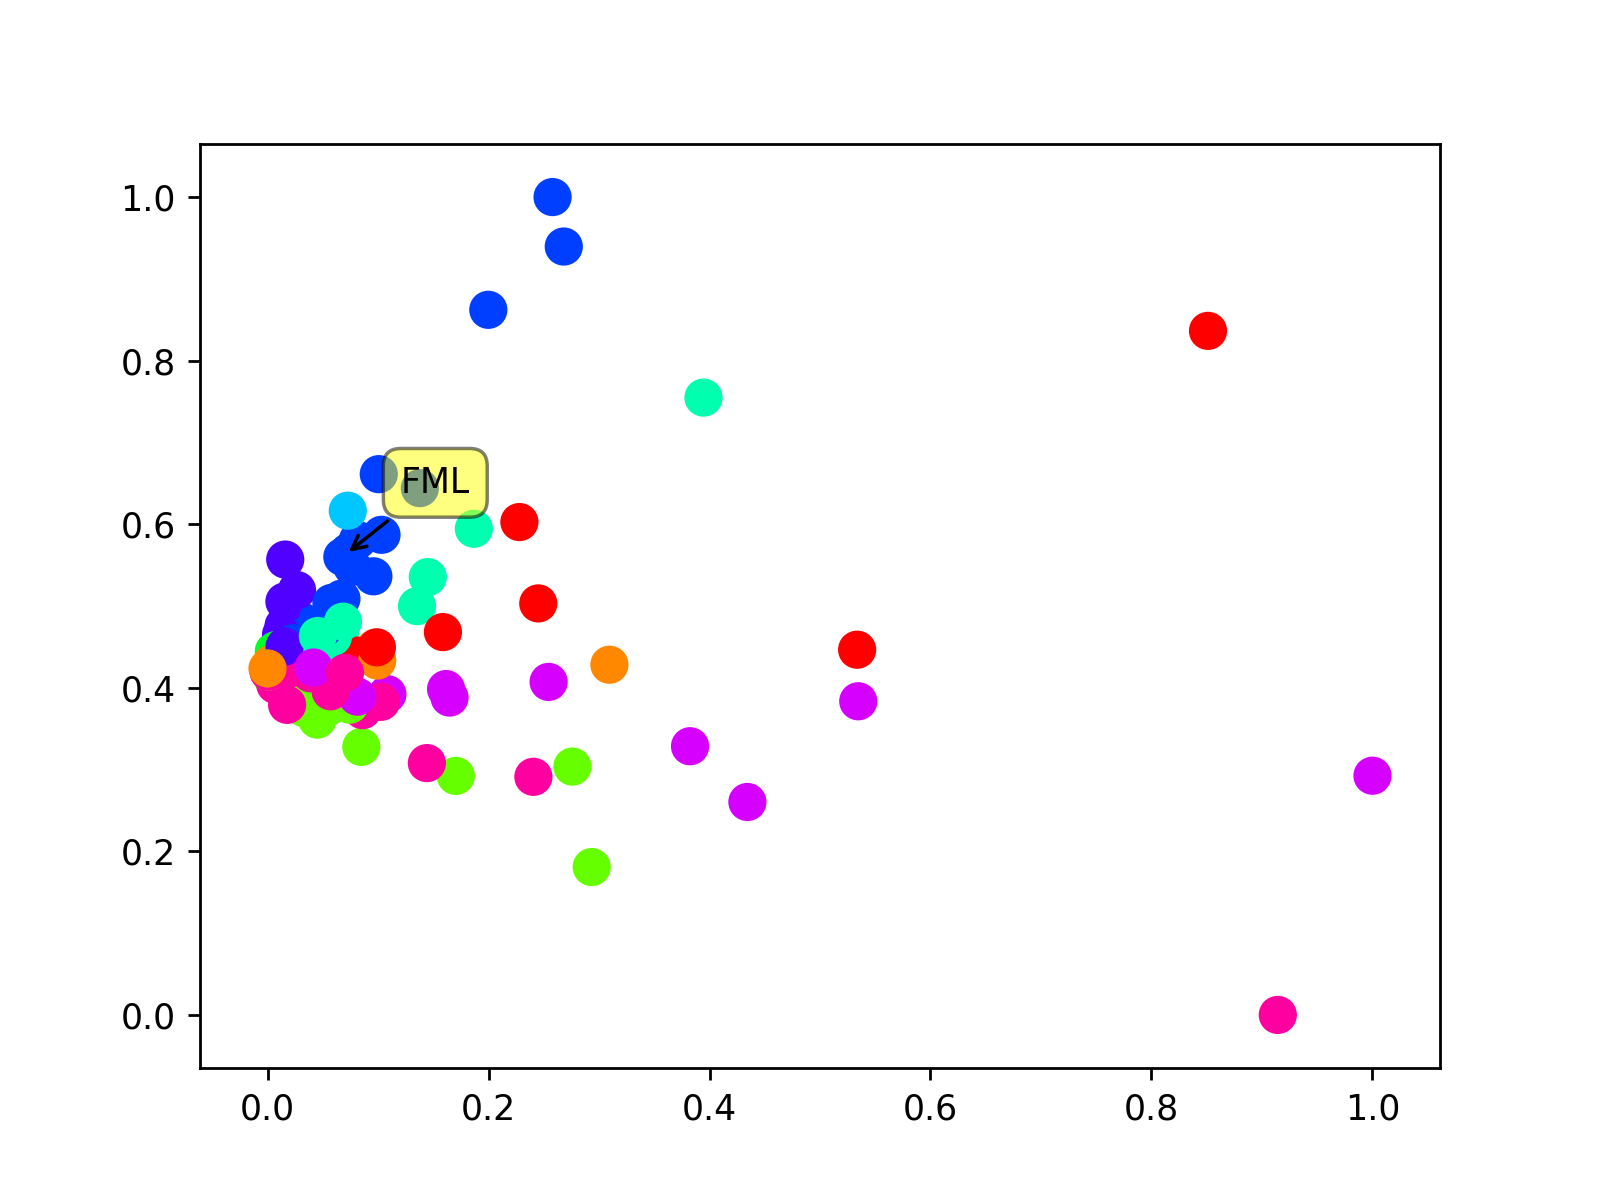

In [9]:
# this lets us add a dynamic visualization – this is important
# since we have a lot of points, and want to show the
# track the point corresponds to when we hover over it
%matplotlib notebook

# load which track is a part of which album
trackAlbumMap = joblib.load('trackIdToAlbum.joblib')
# make it into a set first to make sure all albums are unique
albums = list(set(trackAlbumMap.values()))
# map to a number between 0 and 1 so we can color code
albumMapping = [albums.index(trackAlbumMap[trackId]) / len(albums) for trackId in trackIndexToTrackId]


# this is a library to plot data
import matplotlib.pyplot as plt

# this library helps us display data when we hover points
import mplcursors

def scaleData(data, exponent=1):
    # smallest point in data is 0 now, so we can safely call sqrt
    data -= np.min(data)
    
    data = np.power(data, exponent)
    data /= np.max(data)
    return data

# feel free to play with the exponent to which the data is raised
# it can make the graph easier to visualize
# for instance, the data on the X axis skews pretty exponentially
# with a large concentration towards smaller numbers and less frequency at higher numbers
# if we raise this data to a power less than 1, we can separate the data a little more
# try scaling x's data with a value of 0.5 and see what comes out

x = scaleData(reducedFrequencyMatrix[:, 0], 1)
y = scaleData(reducedFrequencyMatrix[:, 1], 1)

labels = [trackIdToTrackName[id] for id in trackIndexToTrackId]

cmap = plt.cm.hsv

# create colors in the cmap based on our album mapping
colors = [cmap(albumMapping[i]) for i in range(len(reducedFrequencyMatrix))]

fig,ax = plt.subplots()
sc = plt.scatter(x, y, s=100, color=colors)

mplcursors.cursor(ax, hover=True).connect("add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))

plt.show()

## Visualization
* What patterns do you notice in the data?
* How does the visualization help your reasoning?
* Can you think of a better way the data could be displayed or organized?